# Table of Contents
### 1. Loading the Dataset
### 2. Pre-processing the Dataset
### 3. Feature Engineering and Model Building
> ##### a. Creating Meta Features
> ##### b. Counting Nouns and Verbs
> ##### c. Model Building for Meta Features
> ##### d. Tf-Idf Features
> ##### e. Model Building for Complete Feature Set

## 1. Loading the dataset

In [1]:
# Import libraries 
import pandas as pd
import string

In [5]:
# Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Load dataset
data = pd.read_csv('spamdata.csv')
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# distribution of class
data['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

Not surprisingly, the data is unbalanced.

## 2. Pre-processing the dataset

### Build Example First

In [3]:
# Sample document: lowercase
cleaned = data['text'][0].lower()

In [9]:
# Sample document
cleaned

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [4]:
# Pre-initialised list of punctuations
punctuations = string.punctuation

In [5]:
# Pre-initialised list of punctuations
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
# Sample document: Remove punctuations
cleaned = "".join(character for character in cleaned if character not in punctuations)    

In [7]:
# Sample document
cleaned

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [8]:
# Import spacy
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

In [9]:
# spacy document
my_doc = nlp(cleaned)

In [10]:
# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

In [11]:
# Import stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
# Create list of word tokens after removing stopwords
filtered_sentence =[] 

# Iterate over the tokens
for word in token_list:
    # Get token text
    tmp_word = nlp.vocab[word]
    # Check if stopword or not
    if tmp_word.is_stop == False:
        filtered_sentence.append(word) 

cleaned = filtered_sentence

In [17]:
# Print tokens
print(token_list)

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


In [18]:
# Print filtered sentence
print(cleaned)

['jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


In [19]:
# Joining the tokenised words in sample document
cleaned = " ".join(cleaned)
cleaned

'jurong point crazy available bugis n great world la e buffet cine got amore wat'

### Build Function from Work Above

In [20]:
# Preprocessing function
def clean_text(text):
    ## lower case 
    cleaned = text.lower()
    
    ## remove punctuations
    punctuations = string.punctuation
    cleaned = "".join(character for character in cleaned if character not in punctuations)
    
    ## remove stopwords 
    my_doc = nlp(cleaned)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    
    ## remove stop words
    filtered_sentence =[] 

    for word in token_list:
        tmp_word = nlp.vocab[word]
        if tmp_word.is_stop == False:
            filtered_sentence.append(word)
    
    ## Store cleaned document
    cleaned = filtered_sentence
    cleaned = " ".join(cleaned)
    
    return cleaned

The function above is worth keeping (unless there is a Python Module that does all of this automatically).

### Apply the Function to the Text

In [22]:
# Applying the preprocessin function
data["cleaned"] = data["text"].apply(lambda x : clean_text(x))
data.head()

,label,text,word_count,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",20,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,11,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah nt think goes usf lives


## 3. Feature Engineering and Model Building

### a. Creating Meta Features

> 1. Number of words in original text
> 2. Number of words in cleaned text
> 3. Number of characters including spaces in the cleaned text
> 4. Number of characters excluding spaces in the cleaned text
> 5. Number of digits in the cleaned text

In [23]:
# Creating meta features

# Number of words in original text
data["word_count"] = data["text"].apply(lambda x : len(x.split()))
# Number of words in cleaned text
data["word_count_cleaned"] = data["cleaned"].apply(lambda x : len(x.split()))

# Number of characters including spaces in the cleaned text
data["char_count"] = data["cleaned"].apply(lambda x : len(x))
# number of characters excluding spaces in the cleaned text
data["char_count_without_spaces"] = data["cleaned"].apply(lambda x : len(x.replace(" ","")))

# Number of digits in the cleaned text
data["num_dig"] = data["cleaned"].apply(lambda x :  sum([1 if w.isdigit() else 0 for w in x.split()]))

In [24]:
# Print dataset
data.head()

,label,text,word_count,cleaned,word_count_cleaned,char_count,char_count_without_spaces,num_dig
0,ham,"Go until jurong point, crazy.. Available only ...",20,jurong point crazy available bugis n great wor...,15,79,65,0
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni,6,23,18,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry 2 wkly comp win fa cup final tkts 2...,22,131,110,3
3,ham,U dun say so early hor... U c already then say...,11,u dun early hor u c,6,19,14,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah nt think goes usf lives,6,27,22,0


### b. Counting Nouns and Verbs

#### Start with Example Before Coding Function

In [26]:
# Import spacy English language model
import spacy
nlp = spacy.load("en_core_web_sm")

In [27]:
# spacy document
document = nlp(data['cleaned'][0])

In [28]:
# Sample document
document

jurong point crazy available bugis n great world la e buffet cine got amore wat

In [29]:
# POS tags
all_tags = []
for pos in document:
    all_tags.append(pos.tag_)

In [30]:
# POS tags
all_tags

['NNP',
 'NNP',
 'NNP',
 'JJ',
 'NNP',
 'CC',
 'JJ',
 'NN',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'VBD',
 'NNP',
 'NNP']

In [31]:
# Dictionary of noun and verb POS tags
pos_dic = {"noun" : ["NNP", "NN", "NNS", "NNPS"], "verb" : ["VBZ", "VB", "VBD","VBG", "VBN"]}

In [33]:
# Sample document: Noun count
count = 0
for tag in all_tags:
    if tag in pos_dic['noun']:
        count += 1

count

11

#### Create Function from Above Code

In [37]:
# Function for noun and verb counts
def pos_check(txt, POS_noun_verb):

    # spacy document
    txt = nlp(txt)
    
    all_tags = []

    # Get pos tag
    for pos in txt:
        all_tags.append(pos.tag_)
    
    count = 0

    # Count number of nouns and verbs
    for tag in all_tags:
        if tag in pos_dic[POS_noun_verb]:
            count += 1

    return count

In [38]:
# Sample document: Noun count
pos_check("They are playing in the ground", "verb")

1

In [39]:
# Sample document: Verb count
pos_check("They are playing in the ground", "noun")

1

In [40]:
# Applying the function
data["noun_count"] = data["cleaned"].apply(lambda x : pos_check(x, "noun"))
data["verb_count"] = data["cleaned"].apply(lambda x : pos_check(x, "verb"))

In [42]:
# Print output
data.head()

,label,text,word_count,cleaned,word_count_cleaned,char_count,char_count_without_spaces,num_dig,noun_count,verb_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,jurong point crazy available bugis n great wor...,15,79,65,0,11,1
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni,6,23,18,0,5,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry 2 wkly comp win fa cup final tkts 2...,22,131,110,3,12,0
3,ham,U dun say so early hor... U c already then say...,11,u dun early hor u c,6,19,14,0,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah nt think goes usf lives,6,27,22,0,3,2


### c. Model Building for Meta Features

In [43]:
# Label encoding target variable - currently in string format
# This transformer should be used to encode target values, i.e. y, and not the input X.
# https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets
from sklearn.preprocessing import LabelEncoder 

target = data["label"].values
target = LabelEncoder().fit_transform(target)

In [44]:
target

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
# List of features
train = data[['word_count', 'word_count_cleaned', 'char_count', 
              'char_count_without_spaces', 'num_dig', 'noun_count', 
              'verb_count']]

In [46]:
# Train-Validation split
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=20, stratify=target)

In [47]:
# Train and Validatio dataset
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((4179, 7), (4179,)), ((1393, 7), (1393,)))

In [48]:
# Naive bayes
from sklearn import naive_bayes

In [49]:
# Multinomial naive bayes
model = naive_bayes.MultinomialNB()

In [50]:
# Fit model on training data
model.fit(x_train, y_train)

MultinomialNB()

In [51]:
# Prediction on training data
pred_train = model.predict(x_train)
# Prediction on validation data
pred_valid = model.predict(x_valid)

In [52]:
# Accuracy
from sklearn.metrics import accuracy_score

In [47]:
# Training accuracy
accuracy_score(y_train, pred_train)

0.9440057430007178

In [48]:
# Validation accuracy
accuracy_score(y_valid, pred_valid)

0.9382627422828428

### d. Tf-idf Features

In [56]:
# Import Tf-Idf Vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
# Tf-Idf Vectoriser
# Using the 500 most relevant words in the vocabulary
word_tfidf = TfidfVectorizer(max_features=500)

In [76]:
# Fit Tf-Idf Vectoriser
word_tfidf.fit(data["cleaned"].values)

TfidfVectorizer(max_features=500)

In [69]:
os.getcwd()

'c:\\Users\\czwea\\Analytics_Vidhya\\Getting Started NLP\\14. Text Classification'

In [71]:
currentDirectory = os.getcwd()
os.chdir(currentDirectory + '/Assignment')

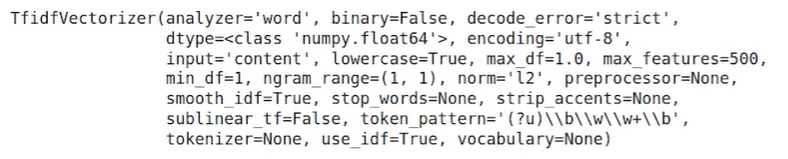

In [72]:
from IPython.display import Image
Image(filename='TD-IDF_Vectorizer.png')

In [77]:
# Transform
word_vectors_tfidf = word_tfidf.transform(data["cleaned"].values)

In [78]:
# Tf-Idf vectors
word_vectors_tfidf

<5572x500 sparse matrix of type '<class 'numpy.float64'>'
	with 21920 stored elements in Compressed Sparse Row format>

Compressed Sparse Row format (CSR) includes only the non 0 values.

Below combine the meta features already developed with those from TD-IDF.

In [80]:
# Combining meta features and Tf-Idf features
from scipy.sparse import hstack, csr_matrix

# List of meta features
meta_features = ['word_count', 'word_count_cleaned',
       'char_count', 'char_count_without_spaces', 'num_dig', 'noun_count',
       'verb_count']

# Meta features
feature_set1 = data[meta_features]

# Combined features
train = hstack([word_vectors_tfidf, csr_matrix(feature_set1)], "csr")
# CSR - Compressed Sparse Row format

### e. Model Building for complete feature set

In [81]:
# Train and Validation datasets
x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=20, stratify=target)

In [82]:
# Train and Validation datasets
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((4179, 507), (4179,)), ((1393, 507), (1393,)))

In [83]:
# Multinomial Naive Bayes Model
model = naive_bayes.MultinomialNB()

In [84]:
# Fit model
model.fit(x_train, y_train)

MultinomialNB()

In [85]:
# Predcition on Training data
pred_train = model.predict(x_train)
# Predcition on Validation data
pred_valid = model.predict(x_valid)

In [86]:
# Training accuracy
accuracy_score(y_train, pred_train)

0.9693706628379996

In [62]:
# Validation accuracy
accuracy_score(y_valid, pred_valid)

0.9605168700646087